In [72]:
import nltk
import mgzip
import pickle
import numpy as np
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import mean_squared_error, accuracy_score

## 1. Polarity analysis using Python Vader

In [56]:
nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dalex\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [57]:
ZIP_PATH = './data/cleanedReviews.gz'

In [58]:
with mgzip.open(ZIP_PATH, 'rb') as f:
    df = pickle.load(f)

df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,cleaned_review_text
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,special book start slow first third middl thir...
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,recommend katz avail free decemb
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,fun fast pace scienc fiction thriller read nig...
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1,recommend read understand go middl america pos...
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,realli enjoy book lot recommend drag littl end...


In [59]:
df_reviews = df[['review_id', 'cleaned_review_text', 'rating']]
df_reviews.head()

,review_id,cleaned_review_text,rating
0,dfdbb7b0eb5a7e4c26d59a937e2e5feb,special book start slow first third middl thir...,5
1,a5d2c3628987712d0e05c4f90798eb67,recommend katz avail free decemb,3
2,2ede853b14dc4583f96cf5d120af636f,fun fast pace scienc fiction thriller read nig...,3
3,ced5675e55cd9d38a524743f5c40996e,recommend read understand go middl america pos...,0
4,332732725863131279a8e345b63ac33e,realli enjoy book lot recommend drag littl end...,4


In [60]:
len(df_reviews[df_reviews['cleaned_review_text'] == ''])

189

In [61]:
len(df_reviews[df_reviews['cleaned_review_text'].isna()])

0

In [63]:
df_reviews = df_reviews[df_reviews['cleaned_review_text'] != '']
len(df_reviews)

899811

In [64]:
len(df_reviews[df_reviews['cleaned_review_text'] == ''])

0

In [68]:
def pred_vader(review_text: str) -> float:
    return analyser.polarity_scores(review_text)['compound']

In [69]:
df_reviews['Vader Prediction'] = df_reviews['cleaned_review_text'].apply(pred_vader)

In [70]:
df_reviews.head()

,review_id,cleaned_review_text,rating,Vader Prediction
0,dfdbb7b0eb5a7e4c26d59a937e2e5feb,special book start slow first third middl thir...,5,0.9776
1,a5d2c3628987712d0e05c4f90798eb67,recommend katz avail free decemb,3,0.7003
2,2ede853b14dc4583f96cf5d120af636f,fun fast pace scienc fiction thriller read nig...,3,0.3142
3,ced5675e55cd9d38a524743f5c40996e,recommend read understand go middl america pos...,0,0.6597
4,332732725863131279a8e345b63ac33e,realli enjoy book lot recommend drag littl end...,4,0.9916


In [74]:
df_reviews['Vader'] = pd.cut(df_reviews['Vader Prediction'], bins=6, labels=[0, 1, 2, 3, 4, 5])
df_reviews = df_reviews.drop('Vader Prediction', axis=1)
df_reviews.head()

,review_id,cleaned_review_text,rating,Vader
0,dfdbb7b0eb5a7e4c26d59a937e2e5feb,special book start slow first third middl thir...,5,5
1,a5d2c3628987712d0e05c4f90798eb67,recommend katz avail free decemb,3,5
2,2ede853b14dc4583f96cf5d120af636f,fun fast pace scienc fiction thriller read nig...,3,3
3,ced5675e55cd9d38a524743f5c40996e,recommend read understand go middl america pos...,0,4
4,332732725863131279a8e345b63ac33e,realli enjoy book lot recommend drag littl end...,4,5


In [121]:
acc = accuracy_score(y_true=df_reviews['rating'], y_pred=df_reviews['Vader'])
mse = mean_squared_error(y_true=df_reviews['rating'], y_pred=df_reviews['Vader'])

results = pd.DataFrame(index = ['Vader'],
                       data = {'Accuracy': acc,
                               'MSE': mse
                               })
results

,Accuracy,MSE
Vader,0.261228,3.610894


## 2. Fine-grained Sentiment Analysis using textblob

In [110]:
from textblob import TextBlob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [111]:
train_df, test_df = train_test_split(df_reviews, test_size=0.2, random_state=25)

In [112]:
print(f"No. of training examples: {train_df.shape[0]}")
print(f"No. of testing examples: {test_df.shape[0]}")

No. of training examples: 719848
No. of testing examples: 179963


Text(0, 0.5, 'Label')

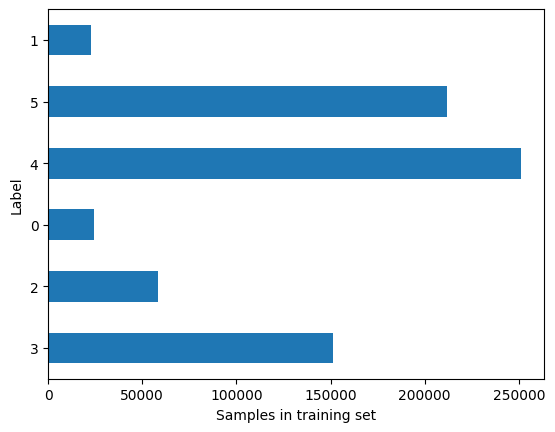

In [113]:
ax = train_df['rating'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Samples in training set')
ax.set_ylabel('Label')

In [114]:
for i in range(6):
    print('Number of %d-rated reviews: %s' %(i, len(train_df[train_df['rating'] == i])))


Number of 0-rated reviews: 24588
Number of 1-rated reviews: 23024
Number of 2-rated reviews: 58107
Number of 3-rated reviews: 151157
Number of 4-rated reviews: 250938
Number of 5-rated reviews: 212034


In [115]:
final_train_df = pd.DataFrame()
for i in range(6):
    temp_df = train_df[train_df['rating'] == i].iloc[:23000]
    final_train_df = pd.concat([final_train_df, temp_df])

final_train_df = shuffle(final_train_df)

In [116]:
print(len(train_df))
print(len(final_train_df))

719848
138000


Text(0, 0.5, 'Label')

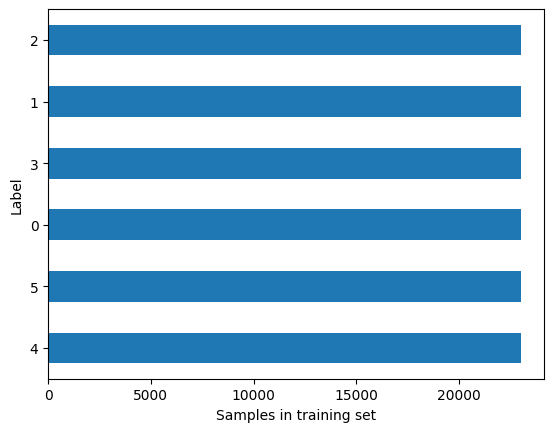

In [117]:
ax = final_train_df['rating'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Samples in training set')
ax.set_ylabel('Label')

In [118]:
def score(review_text: str) -> float:
        return TextBlob(review_text).sentiment.polarity

In [119]:
final_train_df['TextBlob Prediction'] = final_train_df['cleaned_review_text'].apply(score)
final_train_df.head()

,review_id,cleaned_review_text,rating,Vader,TextBlob Prediction
518891,b75f47c576a05152dbb694a256973619,solid star not natur vs nurtur make good fathe...,4,1,0.218182
724501,26057419d06b443d61e320a2e797b388,simpli beauti write not typic fairi tale zoe m...,4,4,0.000000
459618,3784649f5f48fa10dacf38d162b47203,one best book read long long time look book sp...,5,5,0.111111
183733,c1977ece675735da9ae4ece354f54d7d,view spoilerhow interest practic event provok ...,0,5,0.228704
384840,e99f511bbf7e60605b57ae2fc58616a5,lynni young white girl place famili home feebl...,4,2,0.100253


In [120]:
# Convert float score to category based on binning
final_train_df['TextBlob'] = pd.cut(final_train_df['TextBlob Prediction'], bins=6, labels=[0, 1, 2, 3, 4, 5])
final_train_df = final_train_df.drop('TextBlob Prediction', axis=1)
final_train_df.head()

,review_id,cleaned_review_text,rating,Vader,TextBlob
518891,b75f47c576a05152dbb694a256973619,solid star not natur vs nurtur make good fathe...,4,1,3
724501,26057419d06b443d61e320a2e797b388,simpli beauti write not typic fairi tale zoe m...,4,4,2
459618,3784649f5f48fa10dacf38d162b47203,one best book read long long time look book sp...,5,5,3
183733,c1977ece675735da9ae4ece354f54d7d,view spoilerhow interest practic event provok ...,0,5,3
384840,e99f511bbf7e60605b57ae2fc58616a5,lynni young white girl place famili home feebl...,4,2,3


In [134]:
acc = accuracy_score(y_true=final_train_df['rating'], y_pred=final_train_df['TextBlob'])
mse = mean_squared_error(y_true=final_train_df['rating'], y_pred=final_train_df['TextBlob'])

results.loc['TextBlob'] = [acc, mse]
results

,Accuracy,MSE
Vader,0.261228,3.610894
TextBlob,0.192986,2.967029


## Using TF-IDF and SVM or Logistic Regression

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

Help : https://medium.com/analytics-vidhya/sentiment-analysis-on-amazon-reviews-using-tf-idf-approach-c5ab4c36e7a1

In [151]:
from time import time
from pprint import pprint
from os.path import exists
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [150]:
VECTORIZER_PATH = 'data/vectorizer.sav'

In [143]:
# Create a set of unique word along all the 50k reviews
unique_words = set([])

for review in final_train_df['cleaned_review_text']:
    split = review.split()
    for word in split:
        unique_words.add(word)

print('There are %s different words along all the reviews.' %len(unique_words))

There are 148198 different words along all the reviews.


In [142]:
X_train = final_train_df['cleaned_review_text']
Y_train = final_train_df['rating'].astype(str)

print(X_train.shape)
print(Y_train.shape)

(138000,)
(138000,)


In [152]:
X_test = test_df['cleaned_review_text']
Y_test = test_df['rating'].astype(str)

print(X_test.shape)
print(Y_test.shape)

(179963,)
(179963,)


In [228]:
vectorizer= TfidfVectorizer()

In [166]:
if exists(VECTORIZER_PATH):
    vectorizer = pickle.load(open(VECTORIZER_PATH, 'rb'))
    print(f'Model {VECTORIZER_PATH} opened successfully')

else:
    # Define a pipeline combining a text feature extractor with a MultinomialNB Classifier
    pipeline = Pipeline(
        [
            ('tfidf', TfidfVectorizer())
        ]
    )

    # Parameters to use for grid search
    parameters = {
        'tfidf__norm': ['l1', 'l2'],    # Each output row will have unit norm, either:
                                        # l1: Sum of absolute values of vector elements is 1.
                                        # l2: Sum of squares of vector elements is 1. In this case,
                                        # the cosine similarity between two vectors is their dot product.

        'tfidf__min_df' : [1, 2, 3],    # Ignore terms that have a document frequency strictly lower than the given threshold.

        'tfidf__use_idf': [True, False],# Enable inverse-document-frequency re-weighting. If False, idf(t) = 1.

        'tfidf__max_features': [None,
                                int(len(unique_words)*0.9),
                                int(len(unique_words)*0.75),
                                int(len(unique_words)*0.5)],    # Size of the vocabulary based on percentage
                                                                # of the quantity of unique words.

        'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],

        'tfidf__smooth_idf': [True, False],             # Smooth idf weights by adding one to document frequencies,
                                                        # as if an extra document was seen containing every term
                                                        # in the collection exactly once. Prevents zero divisions.

        'tfidf__preprocessor': ['callable', 'None'],    # Override the preprocessing (string transformation) stage
                                                        # while preserving the tokenizing and n-grams generation steps.

        'tfidf__sublinear_tf': [True, False],           # Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).

        'tfidf__tokenizer': ['callable', 'None']        # Override the string tokenization step while preserving
                                                        # the preprocessing and n-grams generation steps.
    }

    # Find the best parameters for both the feature extraction and the classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

    print('Performing grid search...')
    print('Pipeline: ', [name for name, _ in pipeline.steps])
    print('Parameters: ')
    pprint(parameters)
    t0 = time()
    vectorizer = grid_search.fit(list(X_train), list(Y_train))
    print('Done in %0.3fs' % (time() - t0))
    print()

    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set: ')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

    pickle.dump(vectorizer, open(VECTORIZER_PATH, 'wb'))
    print(f'Vectorizer {VECTORIZER_PATH} created successfully')

tfidf = vectorizer.best_estimator_.named_steps['tfidf']

Performing grid search...
Pipeline:  ['tfidf']
Parameters: 
{'tfidf__max_features': [None, 133378, 111148, 74099],
 'tfidf__min_df': [1, 2, 3],
 'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
 'tfidf__norm': ['l1', 'l2'],
 'tfidf__preprocessor': ['callable', 'None'],
 'tfidf__smooth_idf': [True, False],
 'tfidf__sublinear_tf': [True, False],
 'tfidf__tokenizer': ['callable', 'None'],
 'tfidf__use_idf': [True, False]}
Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


ValueError: 
All the 11520 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11520 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Documentos\ESGI\4e_Annee\Deep_Learning\Projet\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Documentos\ESGI\4e_Annee\Deep_Learning\Projet\.venv\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Documentos\ESGI\4e_Annee\Deep_Learning\Projet\.venv\lib\site-packages\sklearn\feature_extraction\text.py", line 2049, in fit
    X = super().fit_transform(raw_documents)
  File "D:\Documentos\ESGI\4e_Annee\Deep_Learning\Projet\.venv\lib\site-packages\sklearn\feature_extraction\text.py", line 1338, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "D:\Documentos\ESGI\4e_Annee\Deep_Learning\Projet\.venv\lib\site-packages\sklearn\feature_extraction\text.py", line 1209, in _count_vocab
    for feature in analyze(doc):
  File "D:\Documentos\ESGI\4e_Annee\Deep_Learning\Projet\.venv\lib\site-packages\sklearn\feature_extraction\text.py", line 111, in _analyze
    doc = preprocessor(doc)
TypeError: 'str' object is not callable


In [229]:
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

# We use fit_transform() on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. We only use transform() on the test data because we use the scaling parameters learned on the train data to scale the test data.

## SVM

In [230]:
clf = LinearSVC(random_state = 0)

# Fitting the Training data into model
clf.fit(tf_x_train, Y_train)

# Predicting the Test data
y_test_pred = clf.predict(tf_x_test)

# Analyzing the Report
report = classification_report(Y_test, y_test_pred, output_dict=True)
report

{'0': {'precision': 0.16830048498606956,
  'recall': 0.510644959298685,
  'f1-score': 0.25316259216142806,
  'support': 6388},
 '1': {'precision': 0.21345889739062193,
  'recall': 0.5740415054519873,
  'f1-score': 0.3111979787386185,
  'support': 5686},
 '2': {'precision': 0.24829425947776124,
  'recall': 0.3338391502276176,
  'f1-score': 0.28478126562913714,
  'support': 14498},
 '3': {'precision': 0.3868049010367578,
  'recall': 0.32606795730819144,
  'f1-score': 0.3538490278635991,
  'support': 37759},
 '4': {'precision': 0.5054256457282592,
  'recall': 0.3164946644760978,
  'f1-score': 0.38924581416562853,
  'support': 62693},
 '5': {'precision': 0.581220640114058,
  'recall': 0.6006535824250553,
  'f1-score': 0.5907773483947681,
  'support': 52939},
 'accuracy': 0.4185193623133644,
 'macro avg': {'precision': 0.3505841381222547,
  'recall': 0.4436236365312724,
  'f1-score': 0.3638356711588632,
  'support': 179963},
 'weighted avg': {'precision': 0.46092728336074346,
  'recall': 0.

In [185]:
results.loc['TF-IDF + SVM'] = [report['accuracy'], '']
results

,Accuracy,MSE
Vader,0.261228,3.610894
TextBlob,0.192986,2.967029
TF-IDF + SVM,0.418519,


## Logistic Regression

In [231]:
clf = LogisticRegression(max_iter = 1000, solver = 'saga')

# Fitting the Training data into model
clf.fit(tf_x_train, Y_train)

# Predicting the Test data
y_test_pred = clf.predict(tf_x_test)

# Analyzing the Report
report = classification_report(Y_test, y_test_pred, output_dict=True)
report

{'0': {'precision': 0.1818861875500935,
  'recall': 0.532874139010645,
  'f1-score': 0.271202645102179,
  'support': 6388},
 '1': {'precision': 0.25930893026191226,
  'recall': 0.57808652831516,
  'f1-score': 0.3580220019605707,
  'support': 5686},
 '2': {'precision': 0.2994470438111442,
  'recall': 0.3884673748103187,
  'f1-score': 0.3381973218038792,
  'support': 14498},
 '3': {'precision': 0.42404798854005016,
  'recall': 0.37630763526576444,
  'f1-score': 0.398753981506167,
  'support': 37759},
 '4': {'precision': 0.5295817902628489,
  'recall': 0.37407685068508445,
  'f1-score': 0.4384493863166849,
  'support': 62693},
 '5': {'precision': 0.615042715308243,
  'recall': 0.6038081565575474,
  'f1-score': 0.6093736595781186,
  'support': 52939},
 'accuracy': 0.4553658251974017,
 'macro avg': {'precision': 0.3848857759557154,
  'recall': 0.47560344744075334,
  'f1-score': 0.4023331660445999,
  'support': 179963},
 'weighted avg': {'precision': 0.49315775057455596,
  'recall': 0.455365

In [232]:
results.loc['TF-IDF + LogisticRegression'] = [report['accuracy'], '']
results

,Accuracy,MSE
Vader,0.261228,3.610894
TextBlob,0.192986,2.967029
TF-IDF + LinearSVC,0.418519,
TF-IDF + LogisticRegression,0.455366,


## Prediction on Test Dataset

In [243]:
print(results)

                             Accuracy       MSE
Vader                        0.261228  3.610894
TextBlob                     0.192986  2.967029
TF-IDF + LinearSVC           0.418519          
TF-IDF + LogisticRegression  0.455366          


In [233]:
df_to_predict = pd.read_csv('./data/goodreads_test.csv')
df_to_predict.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,Sat Nov 10 06:06:13 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sat Nov 10 00:00:00 -0800 2012,1,0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",Fri Nov 09 21:55:16 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,1,0
2,b9450d1c1f97f891c392b1105959b56e,15754052,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,Fri Nov 09 00:25:50 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,0,0
3,b9450d1c1f97f891c392b1105959b56e,17020,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...,Thu Nov 01 00:28:39 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Thu Nov 01 00:00:00 -0700 2012,0,0
4,b9450d1c1f97f891c392b1105959b56e,12551082,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...,Thu Oct 18 00:57:00 -0700 2012,Mon Apr 01 23:00:51 -0700 2013,Sat Mar 30 00:00:00 -0700 2013,Fri Mar 29 00:00:00 -0700 2013,0,0


In [234]:
len(df_to_predict)

478033

In [235]:
from clean_reviews import clean_data

df_to_predict['cleaned_review_text'] = clean_data(df_to_predict['review_text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dalex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 478033/478033 [13:31<00:00, 588.95it/s] 


In [236]:
df_to_predict = df_to_predict.drop(columns = ['user_id',
                                              'book_id',
                                              'review_text',
                                              'date_added',
                                              'date_updated',
                                              'read_at',
                                              'started_at',
                                              'n_votes',
                                              'n_comments'])

In [237]:
df_to_predict.head()

,review_id,cleaned_review_text
0,5c4df7e70e9b438c761f07a4620ccb7c,spoiler alert definit one favorit among food b...
1,8eaeaf13213eeb16ad879a2a2591bbe5,spoiler alert drink huge fan coffe not buy cof...
2,dce649b733c153ba5363a0413cac988f,roar one favorit charact never sky happi read ...
3,8a46df0bb997269d6834f9437a4b0a77,spoiler alert feel like travel europ not money...
4,d11d3091e22f1cf3cb865598de197599,star read enjoy first two novel seri say book ...


In [244]:
tf_x_predict = vectorizer.transform(df_to_predict['cleaned_review_text'])
df_to_predict['Prediction'] = clf.predict(tf_x_predict)

df_to_predict.head()

,review_id,cleaned_review_text,Prediction
0,5c4df7e70e9b438c761f07a4620ccb7c,spoiler alert definit one favorit among food b...,4
1,8eaeaf13213eeb16ad879a2a2591bbe5,spoiler alert drink huge fan coffe not buy cof...,3
2,dce649b733c153ba5363a0413cac988f,roar one favorit charact never sky happi read ...,4
3,8a46df0bb997269d6834f9437a4b0a77,spoiler alert feel like travel europ not money...,3
4,d11d3091e22f1cf3cb865598de197599,star read enjoy first two novel seri say book ...,4


In [246]:
resultat = df_to_predict.drop(columns = ['cleaned_review_text'])
resultat.head()

,review_id,Prediction
0,5c4df7e70e9b438c761f07a4620ccb7c,4
1,8eaeaf13213eeb16ad879a2a2591bbe5,3
2,dce649b733c153ba5363a0413cac988f,4
3,8a46df0bb997269d6834f9437a4b0a77,3
4,d11d3091e22f1cf3cb865598de197599,4


In [250]:
resultat.to_csv('./submits/first.csv', index=False)